In [1]:
import tensorflow as tf 
import numpy as np
from keras.preprocessing import image
# -from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from efficientnet_func import EfficientNetB2

In [2]:
# Set up the GPU to avoid the runtime error: Could not create cuDNN handle...
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
def preprocess_input(x):
    
    x = np.expand_dims(x, axis=0)
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    output = np.multiply(x, 2.0)

    return output

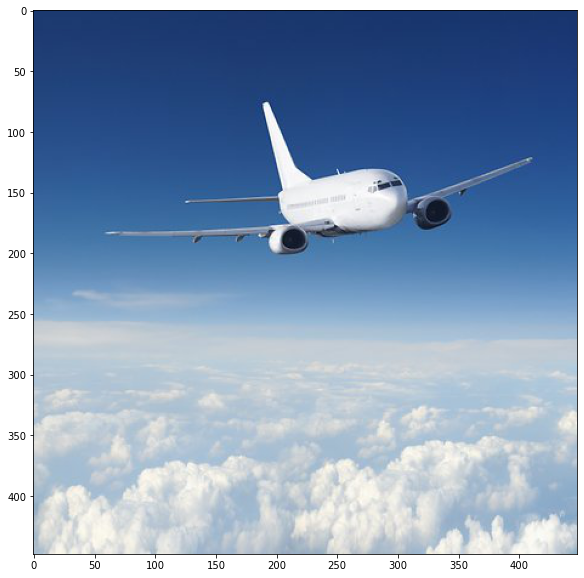

In [4]:
# test image
img_path = '/home/mike/Documents/keras_efficientnet/images/plane.jpg'
image = imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img

if __name__ == '__main__':

    model = EfficientNetB2(include_top=True, weights='imagenet')
    
    model.summary()

    img = image.load_img(img_path, target_size=(260,260))
    output = preprocess_input(img)
    print('Input image shape:', output.shape)

    preds = model.predict(output)
    print(np.argmax(preds))
    print('Predicted:', decode_predictions(preds,1))

Model: "efficientnet-b2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 261, 261, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 130, 130, 32) 864         stem_conv_pad[0][0]              
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 130, 130, 32) 128         stem_conv[0][0]                  
____________________________________________________________________________________

404
Predicted: [[('n02690373', 'airliner', 0.8306194)]]
